<a href="https://colab.research.google.com/github/manas1802/Blog-App/blob/main/digits_classification_tensorflow_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [36]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import sys
from tqdm.notebook import tqdm

# **TensorFlow**

In [38]:
# (x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
def create_bias(x, y, reduced_digits, reduction_factor=0.5):

    x_new, y_new = [], []

    for digit in range(10):
        indices = np.where(y == digit)[0]

        if digit in reduced_digits:
            num_samples = int(len(indices) * reduction_factor)
        else:
            num_samples = len(indices)

        selected_indices = np.random.choice(indices, num_samples, replace=False)

        x_new.append(x[selected_indices])
        y_new.append(y[selected_indices])

    x_balanced = np.concatenate(x_new)
    y_balanced = np.concatenate(y_new)

    return x_balanced, y_balanced


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, y_train = create_bias(x_train, y_train, reduced_digits=[3, 6, 9], reduction_factor=0.5)


In [40]:
print("Shape of train data : ", x_train.shape )
print("Shape of test data : ", x_test.shape )

Shape of train data :  (51000, 28, 28)
Shape of test data :  (10000, 28, 28)


In [41]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

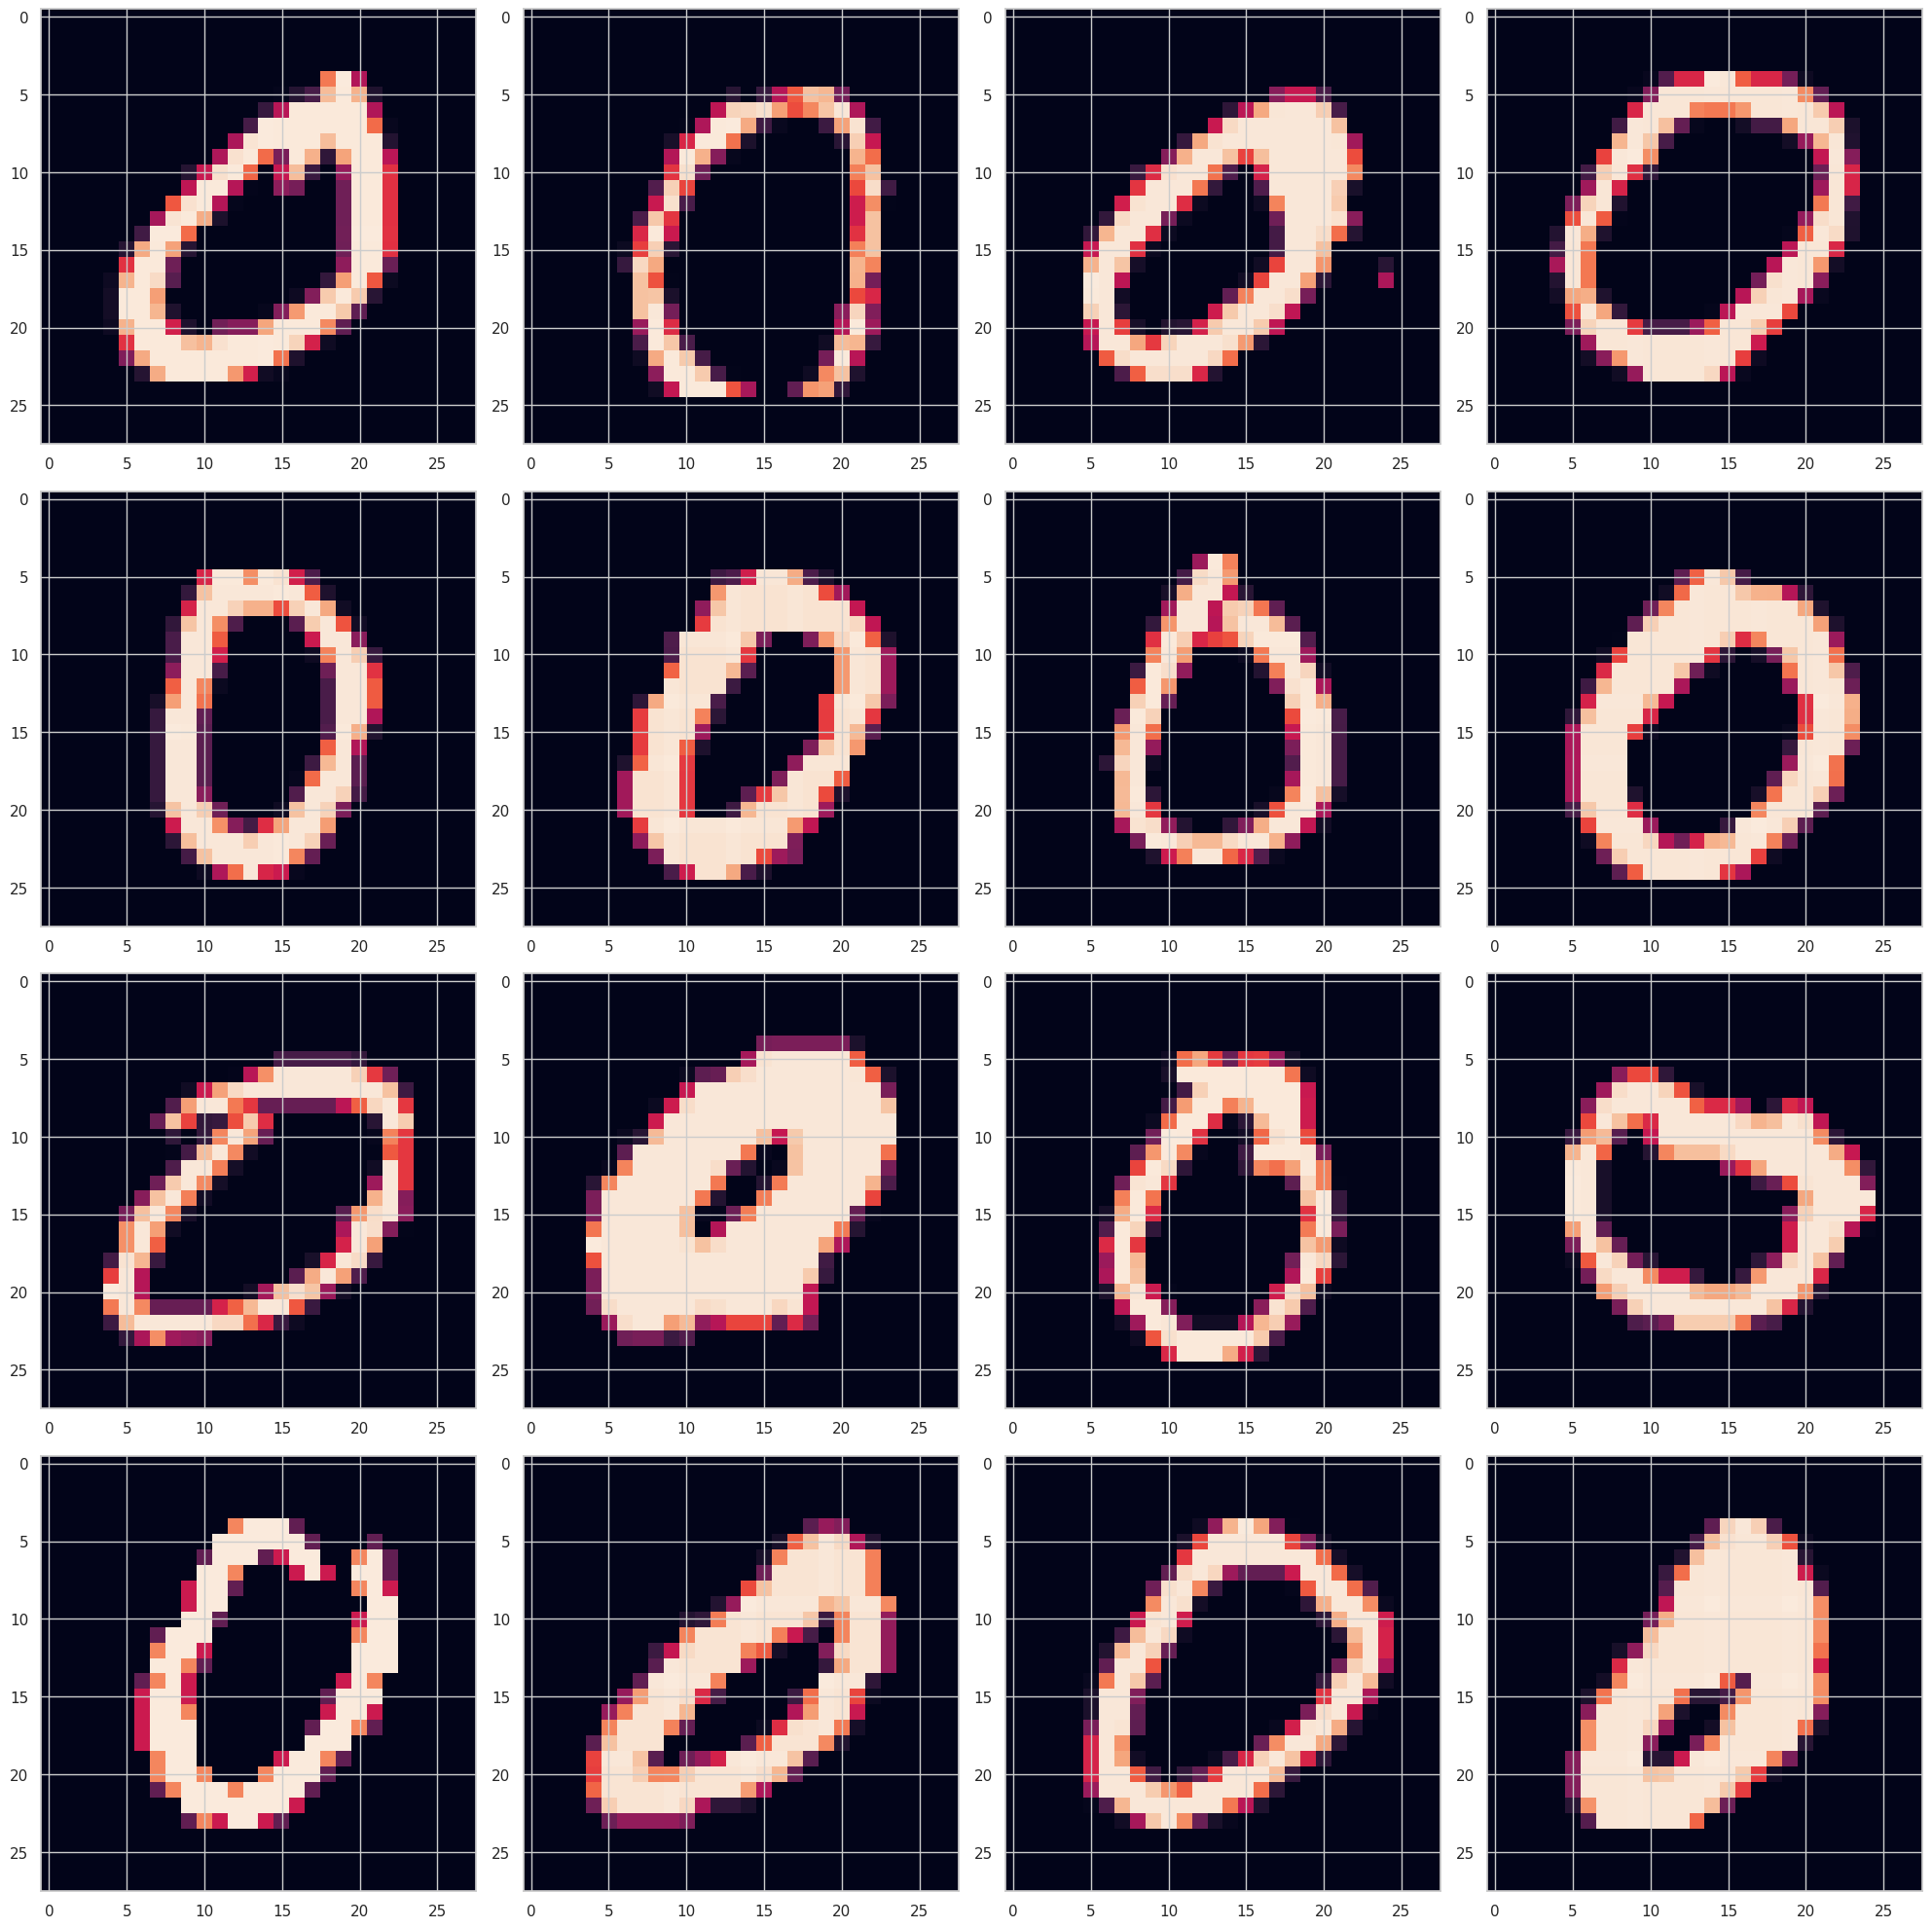

In [42]:
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])

plt.tight_layout()
plt.show()

In [43]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  41,
         51, 132, 252, 252, 214,  51,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 202,
        252, 250, 250, 250, 252, 250, 160, 102,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 231,
        252, 250, 250, 250, 252, 250, 250, 250, 123,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 250,
        252, 250, 250, 250, 252, 250, 250, 250, 243, 121,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 252, 252, 252,
        254, 232,  80,   0,   0,  82, 202, 243, 254, 171,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 250, 250, 250,
        252, 149,   0,   0,   0,   0,   0, 202, 252, 250, 100,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 250, 250, 250,
        222,  60,   0,   0,   0,   0,   0, 202, 252, 250, 100,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 252, 250, 250, 250,
         40,   0,   0,   0,   0,   0,   0, 202, 252, 250, 100,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  31, 213, 254, 252, 252,  49,
          0,   0,   0,   0,   0,   0, 152, 252, 254, 232,  80,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151, 250, 252, 250, 189,  29,
          0,   0,   0,   0,   0,   0, 151, 250, 252, 149,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151, 250, 252, 250, 100,   0,
          0,   0,   0,   0,   0,   0, 151, 250, 222,  60,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151, 250, 252, 169,  20,   0,
          0,   0,   0,   0,   0,  82, 231, 250, 202,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 172, 252, 254, 150,   0,   0,
          0,   0,   0,   0,  92, 252, 252, 252,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 102, 250, 250, 252, 149,   0,   0,
          0,   0,   0,  82, 252, 250, 250, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 102, 250, 250, 252, 149,   0,   0,
          0,  62, 151, 231, 252, 250, 159,  20,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 102, 250, 250, 252, 149,   0,   0,
         41, 221, 250, 250, 252, 250, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 152, 252, 255, 252, 252, 252,
        254, 252, 252, 252, 203, 121,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  91, 231, 252, 250, 250, 250,
        252, 250, 250, 250,  82,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 252, 250, 250, 250,
        252, 250, 159, 100,  80,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [44]:
X_train = x_train / 255
X_test = x_test / 255

In [45]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
model = Sequential()

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [48]:
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8910 - loss: 0.3890 - val_accuracy: 0.1310 - val_loss: 10.1833
Epoch 2/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0797 - val_accuracy: 0.1323 - val_loss: 11.9387
Epoch 3/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9841 - loss: 0.0521 - val_accuracy: 0.1308 - val_loss: 13.7795
Epoch 4/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9872 - loss: 0.0382 - val_accuracy: 0.1327 - val_loss: 14.8177
Epoch 5/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.1327 - val_loss: 15.6090
Epoch 6/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.1330 - val_loss: 15.1969
Epoch 7/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.1324 - val_loss: 16.6568
Epoch 8/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9958 - loss: 0.

In [49]:
y_prod = model.predict(X_test)
y_pred = y_prod.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

In [51]:
print("The accuracy score is : " , accuracy_score(y_test,y_pred))

The accuracy score is :  0.787


## Accuracy graph

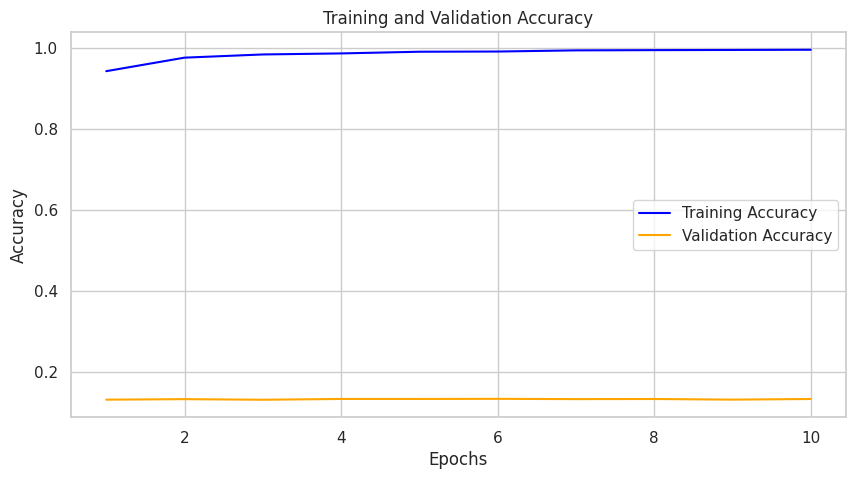

In [52]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['accuracy']) + 1),
             y=history.history['accuracy'],
             label='Training Accuracy',
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1),
             y=history.history['val_accuracy'],
             label='Validation Accuracy',
             color='orange')


plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss graph

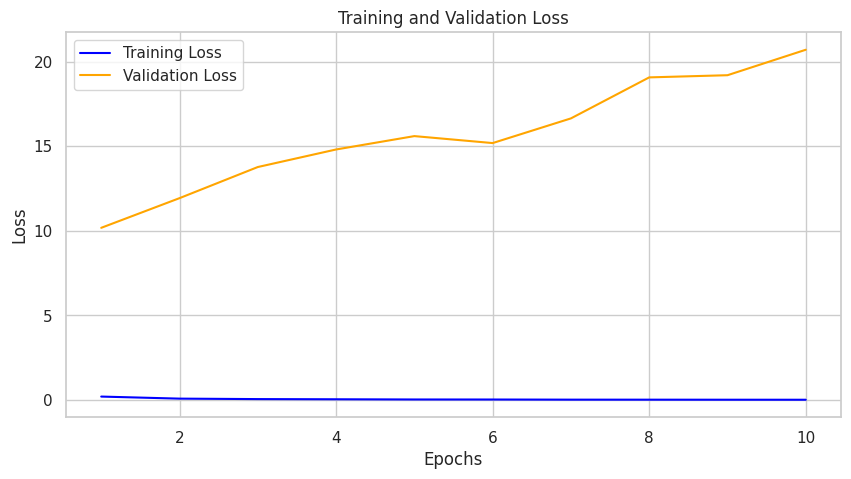

In [53]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['loss']) + 1),
             y=history.history['loss'],
             label='Training Loss',
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_loss']) + 1),
             y=history.history['val_loss'],
             label='Validation Loss',
             color='orange')


plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **PyTorch Model Acc= 99.02%**

In [54]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [55]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

def create_biased_dataset(dataset, reduced_digits, reduction_factor=0.5):

    indices = []
    targets = np.array(dataset.targets)

    for digit in range(10):
        digit_indices = np.where(targets == digit)[0]

        if digit in reduced_digits:
            num_samples = int(len(digit_indices) * reduction_factor)
        else:
            num_samples = len(digit_indices)

        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        indices.extend(selected_indices)

    return Subset(dataset, indices)


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset = create_biased_dataset(train_dataset, reduced_digits=[3, 6, 9], reduction_factor=0.5)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [56]:
#CNN Model used
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training the Model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')



Epoch [1/10], Loss: 0.2080, Accuracy: 93.67%
Epoch [2/10], Loss: 0.0582, Accuracy: 98.18%
Epoch [3/10], Loss: 0.0405, Accuracy: 98.69%
Epoch [4/10], Loss: 0.0294, Accuracy: 99.10%
Epoch [5/10], Loss: 0.0238, Accuracy: 99.22%
Epoch [6/10], Loss: 0.0176, Accuracy: 99.46%
Epoch [7/10], Loss: 0.0147, Accuracy: 99.53%
Epoch [8/10], Loss: 0.0118, Accuracy: 99.60%
Epoch [9/10], Loss: 0.0122, Accuracy: 99.59%
Epoch [10/10], Loss: 0.0086, Accuracy: 99.71%


In [60]:
#Model Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model: {100 * correct / total:.2f}%')

Accuracy of the model: 99.04%
